In [1]:
import numpy as np

In [2]:
# Create a 10x2 array representing 10 points on a two-dimensional plane
X = np.random.rand(10, 2)
X

array([[0.53553839, 0.22492698],
       [0.12901736, 0.17140127],
       [0.49004356, 0.86684729],
       [0.67618756, 0.87159929],
       [0.01874007, 0.83987831],
       [0.91706881, 0.8856391 ],
       [0.16873935, 0.67090378],
       [0.13345388, 0.61266397],
       [0.20012686, 0.3698672 ],
       [0.04639068, 0.36640352]])

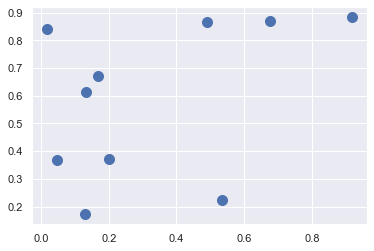

In [3]:
# plot these points
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100)

In [4]:
# compute the distance between each pair of points

# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]

# square the coordinate differences
sq_differences = differences ** 2

# sum  the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq # 10x10 numpy array

array([[0.        , 0.16812435, 0.41413147, 0.43796726, 0.64524564,
        0.58210597, 0.33343685, 0.31201193, 0.13350857, 0.2592811 ],
       [0.16812435, 0.        , 0.61398508, 0.78967249, 0.45902263,
        1.13116076, 0.2510806 , 0.19473245, 0.04444529, 0.04485305],
       [0.41413147, 0.61398508, 0.        , 0.03467217, 0.2228543 ,
        0.1827037 , 0.14163025, 0.19176536, 0.3310409 , 0.44727185],
       [0.43796726, 0.78967249, 0.03467217, 0.        , 0.43324342,
        0.05822089, 0.29778238, 0.36160735, 0.47836888, 0.65186688],
       [0.64524564, 0.45902263, 0.2228543 , 0.43324342, 0.        ,
        0.80908856, 0.05105217, 0.06478561, 0.2538116 , 0.22494293],
       [0.58210597, 1.13116076, 0.1827037 , 0.05822089, 0.80908856,
        0.        , 0.60610824, 0.68856778, 0.78002641, 1.02768599],
       [0.33343685, 0.2510806 , 0.14163025, 0.29778238, 0.05105217,
        0.60610824, 0.        , 0.00463694, 0.0916082 , 0.10768961],
       [0.31201193, 0.19473245, 0.1917653

In [5]:
# use argsort to sort array and return indices
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 8, 1, 9, 7, 6, 2, 3, 5, 4],
       [1, 8, 9, 0, 7, 6, 4, 2, 3, 5],
       [2, 3, 6, 5, 7, 4, 8, 0, 9, 1],
       [3, 2, 5, 6, 7, 4, 0, 8, 9, 1],
       [4, 6, 7, 2, 9, 8, 3, 1, 0, 5],
       [5, 3, 2, 0, 6, 7, 8, 4, 9, 1],
       [6, 7, 4, 8, 9, 2, 1, 3, 0, 5],
       [7, 6, 8, 4, 9, 2, 1, 0, 3, 5],
       [8, 9, 1, 7, 6, 0, 4, 2, 3, 5],
       [9, 8, 1, 7, 6, 4, 0, 2, 3, 5]])

In [11]:
# get k nearest neighbors (get the smallest k+1 distances)
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
nearest_partition

array([[0, 5, 2, 3, 1, 4, 6, 7, 8, 9],
       [2, 1, 9, 6, 0, 5, 3, 7, 8, 4],
       [2, 1, 9, 6, 0, 5, 3, 7, 8, 4],
       [4, 3, 6, 8, 5, 2, 7, 0, 1, 9],
       [3, 8, 4, 5, 6, 0, 1, 7, 2, 9],
       [5, 0, 4, 3, 8, 2, 6, 7, 1, 9],
       [3, 6, 7, 2, 9, 4, 5, 1, 8, 0],
       [7, 6, 9, 3, 2, 4, 5, 1, 8, 0],
       [3, 8, 4, 5, 6, 0, 1, 7, 2, 9],
       [1, 2, 9, 6, 3, 7, 0, 5, 8, 4]])

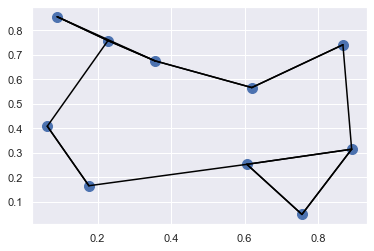

In [12]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # zip magic
        plt.plot(*zip(X[j], X[i]), color='black')